In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [4]:
circuit = Circuit('Low-Pass RC Filter')
circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'out', 1e3)
C1 = circuit.C(1, 'out', circuit.gnd, 1e-6)

2020-12-12 16:32:58,396 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


In [5]:
break_frequency = 1 / (2 * math.pi * float(R1.resistance * C1.capacitance))
print("Break frequency = {:.1f} Hz".format(break_frequency))

Break frequency = 159.2 Hz


In [7]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=10,  variation='dec')


2020-12-12 16:34:55,505 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less
2020-12-12 16:34:55,506 - PySpice.Probe.WaveForm.WaveForm - Unit.WARNING - Should be unit less


C:\Users\nebst\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
C:\Users\nebst\Anaconda3\lib\site-packages\PySpice\Plot\BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, phase, basex=10, **kwargs)


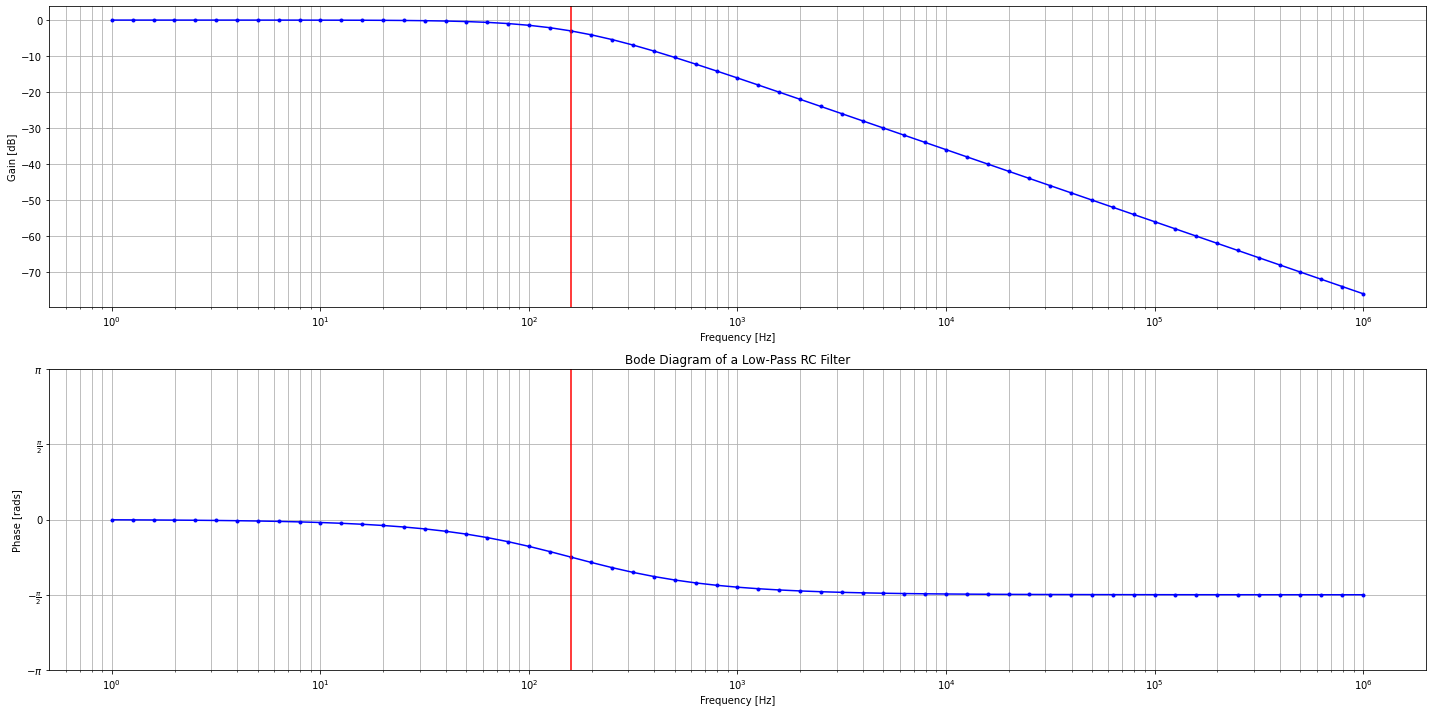

In [8]:
figure, axes = plt.subplots(2, figsize=(20, 10))
plt.title("Bode Diagram of a Low-Pass RC Filter")
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
)
for ax in axes:
    ax.axvline(x=break_frequency, color='red')

plt.tight_layout()